Описание задачи
Мы анализируем данные о телешоу с использованием TVMaze API для выявления закономерностей в жанрах, рейтингах, длительности, страны производства и тд. Проект направлен на понимание рыночных предпочтений, выявление популярных категорий, а также оценку качества данных (аномалии, пропуски).

In [2]:
pip install wordcloud -q

Note: you may need to restart the kernel to use updated packages.


Импортируем необходимые библиотеки

In [4]:
import pandas as pd
import requests
import time
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud

Подключаемся к API, получаем данные

In [6]:
def get_all_shows(max_pages=22, delay=1):
    """
    Собирает данные с TVMaze API с использованием пагинации
    
    Параметры:
    max_pages - максимальное количество страниц для сбора
    delay - задержка между запросами (в секундах)
    """
    all_shows = []
    page = 0
    
    while page < max_pages:
        try:
            # Отправляем запрос с параметром пагинации
            url = f"https://api.tvmaze.com/shows?page={page}"
            response = requests.get(url, timeout=10)
            
            # Проверяем статус ответа
            if response.status_code == 200:
                page_data = response.json()
                if not page_data:  # Пустая страница - прекращаем сбор
                    print(f"Страница {page} пуста. Сбор данных завершен.")
                    break
                    
                all_shows.extend(page_data)
                print(f"Страница {page} обработана. Всего записей: {len(all_shows)}")
                page += 1
                time.sleep(delay)
                
            elif response.status_code == 404:
                print(f"Страница {page} не найдена. Сбор данных завершен.")
                break
                
            else:
                print(f"Ошибка {response.status_code}. Повторная попытка...")
                time.sleep(5)
                
        except Exception as e:
            print(f"Ошибка: {str(e)}")
            time.sleep(5)
            
    return all_shows

# Получаем данные
shows_data = get_all_shows()

# Создаем DataFrame
df = pd.DataFrame(shows_data)

# Обрабатываем вложенные поля
def extract_nested(data, keys):
    """Извлекает вложенные данные из словаря"""
    if not isinstance(data, dict):
        return None
    for key in keys:
        data = data.get(key)
        if data is None:
            return None
    return data

# Сохраняем результат
df.to_csv("tvmaze_full_dataset.csv", index=False)
print(f"\nИтоговый датасет: {df.shape[0]} строк, {df.shape[1]} столбцов")


Страница 0 обработана. Всего записей: 240
Страница 1 обработана. Всего записей: 485
Страница 2 обработана. Всего записей: 727
Страница 3 обработана. Всего записей: 970
Страница 4 обработана. Всего записей: 1208
Страница 5 обработана. Всего записей: 1441
Страница 6 обработана. Всего записей: 1675
Страница 7 обработана. Всего записей: 1917
Страница 8 обработана. Всего записей: 2149
Страница 9 обработана. Всего записей: 2380
Страница 10 обработана. Всего записей: 2609
Страница 11 обработана. Всего записей: 2837
Страница 12 обработана. Всего записей: 3063
Страница 13 обработана. Всего записей: 3298
Страница 14 обработана. Всего записей: 3526
Страница 15 обработана. Всего записей: 3755
Страница 16 обработана. Всего записей: 3987
Страница 17 обработана. Всего записей: 4229
Страница 18 обработана. Всего записей: 4470
Страница 19 обработана. Всего записей: 4705
Страница 20 обработана. Всего записей: 4947
Страница 21 обработана. Всего записей: 5188

Итоговый датасет: 5188 строк, 23 столбцов


In [7]:
df.head(10)

,id,url,name,type,language,genres,status,runtime,averageRuntime,premiered,...,rating,weight,network,webChannel,dvdCountry,externals,image,summary,updated,_links
0,1,https://www.tvmaze.com/shows/1/under-the-dome,Under the Dome,Scripted,English,"[Drama, Science-Fiction, Thriller]",Ended,60.0,60.0,2013-06-24,...,{'average': 6.5},99,"{'id': 2, 'name': 'CBS', 'country': {'name': '...",None,None,"{'tvrage': 25988, 'thetvdb': 264492, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p><b>Under the Dome</b> is the story of a sma...,1739649693,{'self': {'href': 'https://api.tvmaze.com/show...
1,2,https://www.tvmaze.com/shows/2/person-of-interest,Person of Interest,Scripted,English,"[Action, Crime, Science-Fiction]",Ended,60.0,60.0,2011-09-22,...,{'average': 8.8},99,"{'id': 2, 'name': 'CBS', 'country': {'name': '...",None,None,"{'tvrage': 28376, 'thetvdb': 248742, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>You are being watched. The government has a...,1724121898,{'self': {'href': 'https://api.tvmaze.com/show...
2,3,https://www.tvmaze.com/shows/3/bitten,Bitten,Scripted,English,"[Drama, Horror, Romance]",Ended,60.0,60.0,2014-01-11,...,{'average': 7.5},95,"{'id': 7, 'name': 'CTV Sci-Fi Channel', 'count...",None,None,"{'tvrage': 34965, 'thetvdb': 269550, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>Based on the critically acclaimed series of...,1704793709,{'self': {'href': 'https://api.tvmaze.com/show...
3,4,https://www.tvmaze.com/shows/4/arrow,Arrow,Scripted,English,"[Drama, Action, Science-Fiction]",Ended,60.0,60.0,2012-10-10,...,{'average': 7.4},98,"{'id': 5, 'name': 'The CW', 'country': {'name'...",None,None,"{'tvrage': 30715, 'thetvdb': 257655, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,"<p>After a violent shipwreck, billionaire play...",1736039613,{'self': {'href': 'https://api.tvmaze.com/show...
4,5,https://www.tvmaze.com/shows/5/true-detective,True Detective,Scripted,English,"[Drama, Crime, Thriller]",Running,60.0,63.0,2014-01-12,...,{'average': 8.1},99,"{'id': 8, 'name': 'HBO', 'country': {'name': '...",None,None,"{'tvrage': 31369, 'thetvdb': 270633, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>Touch darkness and darkness touches you bac...,1725758278,{'self': {'href': 'https://api.tvmaze.com/show...
5,6,https://www.tvmaze.com/shows/6/the-100,The 100,Scripted,English,"[Action, Adventure, Science-Fiction]",Ended,60.0,60.0,2014-03-19,...,{'average': 7.7},98,"{'id': 5, 'name': 'The CW', 'country': {'name'...",None,None,"{'tvrage': 34770, 'thetvdb': 268592, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,"<p>Ninety-seven years ago, nuclear Armageddon ...",1704793476,{'self': {'href': 'https://api.tvmaze.com/show...
6,7,https://www.tvmaze.com/shows/7/homeland,Homeland,Scripted,English,"[Drama, Thriller, Espionage]",Ended,60.0,60.0,2011-10-02,...,{'average': 8.2},94,"{'id': 9, 'name': 'Paramount+ with Showtime', ...",None,None,"{'tvrage': 27811, 'thetvdb': 247897, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>The winner of 6 Emmy Awards including Outst...,1737321678,{'self': {'href': 'https://api.tvmaze.com/show...
7,8,https://www.tvmaze.com/shows/8/glee,Glee,Scripted,English,"[Drama, Music, Romance]",Ended,60.0,60.0,2009-05-19,...,{'average': 6.6},95,"{'id': 4, 'name': 'FOX', 'country': {'name': '...",None,None,"{'tvrage': 21704, 'thetvdb': 83610, 'imdb': 't...",{'medium': 'https://static.tvmaze.com/uploads/...,<p><b>Glee </b>is a musical comedy about a gro...,1731263062,{'self': {'href': 'https://api.tvmaze.com/show...
8,9,https://www.tvmaze.com/shows/9/revenge,Revenge,Scripted,English,"[Drama, Thriller, Mystery]",Ended,60.0,60.0,2011-09-21,...,{'average': 7.7},94,"{'id': 3, 'name': 'ABC', 'country': {'name': '...",None,None,"{'tvrage': 28387, 'thetvdb': 248837, 'imdb': '...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>This is not a story about forgiveness; <b>R...,1704794148,{'self': {'

Смотрим сколько в колонках отсутствующих данных и их долю

In [9]:
df.isna().sum()

id                   0
url                  0
name                 0
type                 0
language             1
genres               0
status               0
runtime            206
averageRuntime      37
premiered           14
ended              509
officialSite      2204
schedule             0
rating               0
weight               0
network            213
webChannel        4935
dvdCountry        5183
externals            0
image               25
summary             47
updated              0
_links               0
dtype: int64

In [10]:
df.isna().mean()

id                0.000000
url               0.000000
name              0.000000
type              0.000000
language          0.000193
genres            0.000000
status            0.000000
runtime           0.039707
averageRuntime    0.007132
premiered         0.002699
ended             0.098111
officialSite      0.424827
schedule          0.000000
rating            0.000000
weight            0.000000
network           0.041056
webChannel        0.951234
dvdCountry        0.999036
externals         0.000000
image             0.004819
summary           0.009059
updated           0.000000
_links            0.000000
dtype: float64

Чистим данные, если в колонках больше 30% nan, то удаляем всю колонку, если меньше, то удаляем строки с nan

In [12]:
cols_to_drop = df.columns[df.isna().mean() > 0.3]
df_clean = df.drop(cols_to_drop, axis=1)
df_clean = df_clean.dropna(axis=0, how="any")

In [13]:
df = df_clean

Количество строк после чистки

In [15]:
df.shape

(4400, 20)

Выведем те шоу, в которых длительность серии выше средних показателей

In [17]:
Q1 = df['averageRuntime'].quantile(0.25)
Q3 = df['averageRuntime'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[
    (df['averageRuntime'] < (Q1 - 1.5 * IQR)) | 
    (df['averageRuntime'] > (Q3 + 1.5 * IQR))
]

print("Аномальные значения длительности:")
print(outliers[['name', 'averageRuntime']])  

Аномальные значения длительности:
                                   name  averageRuntime
451                             Columbo           108.0
597                     Sons of Liberty           120.0
617                           Ascension           120.0
620   Sacred Journeys with Bruce Feiler           120.0
630                        The Red Tent           120.0
...                                 ...             ...
3881                            McCloud           110.0
3919  1066: The Battle for Middle Earth           115.0
4360   Squadra Antimafia - Palermo Oggi           110.0
4919                   X-Factor Ukraine           120.0
4963                   The Last Templar           120.0

[62 rows x 2 columns]


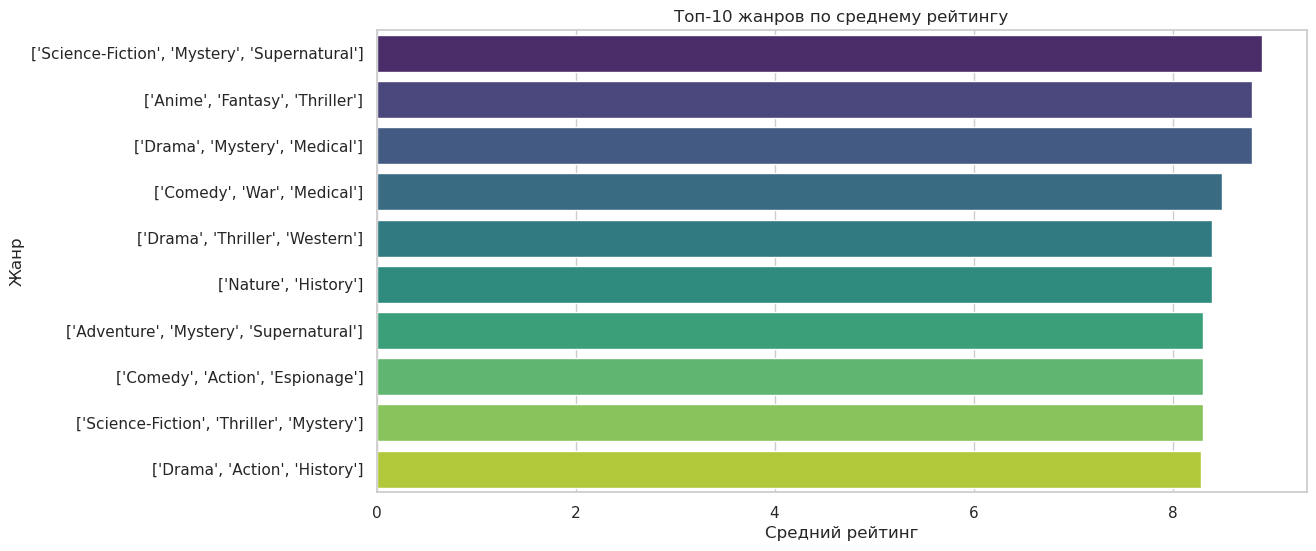

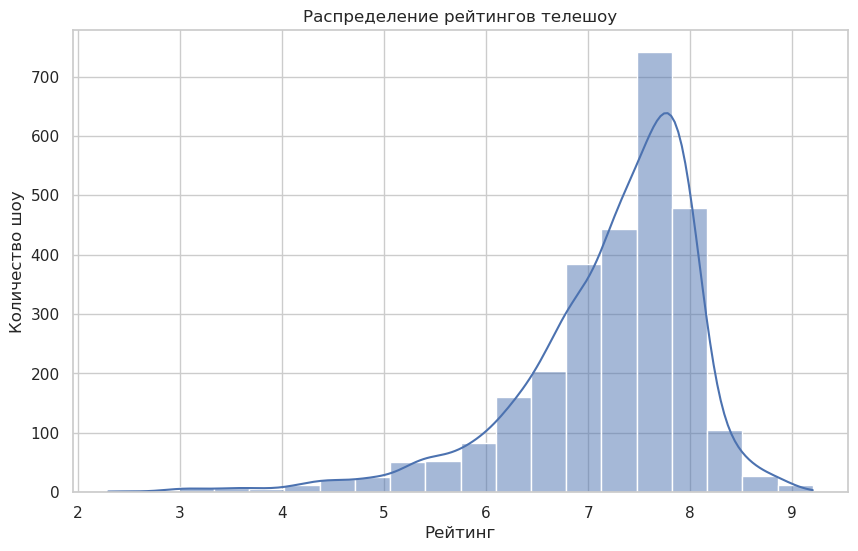

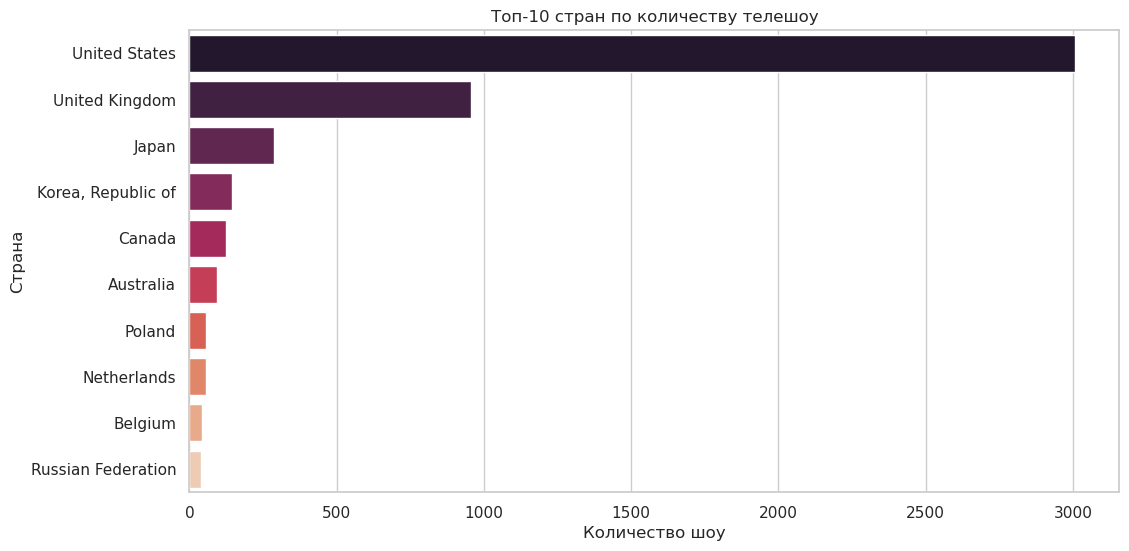

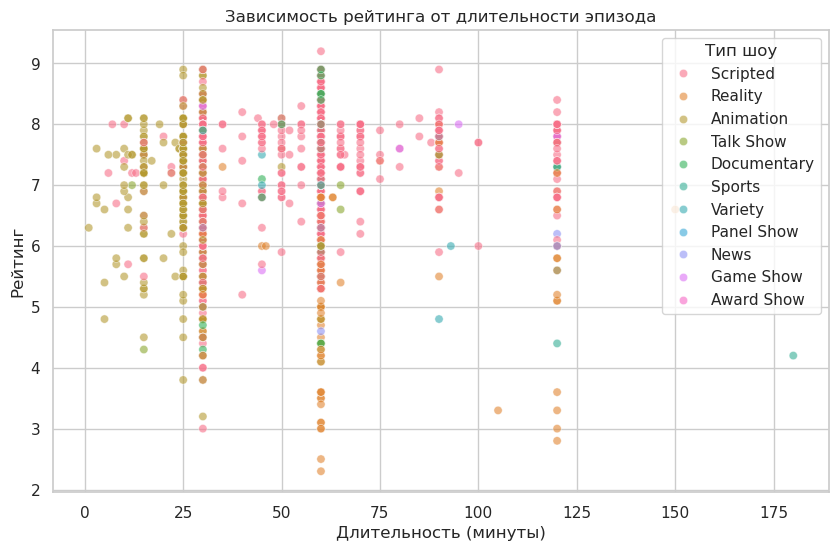

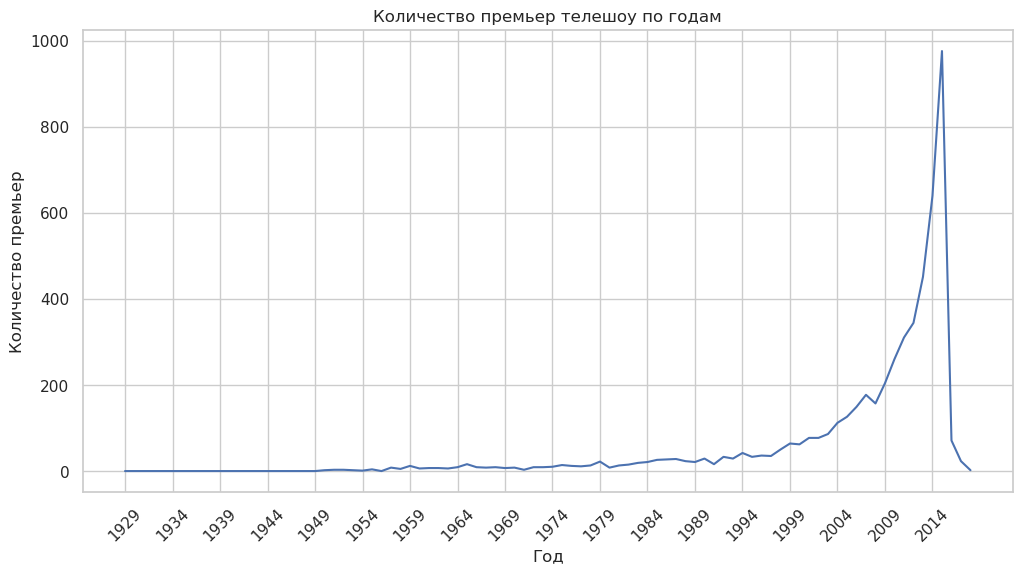

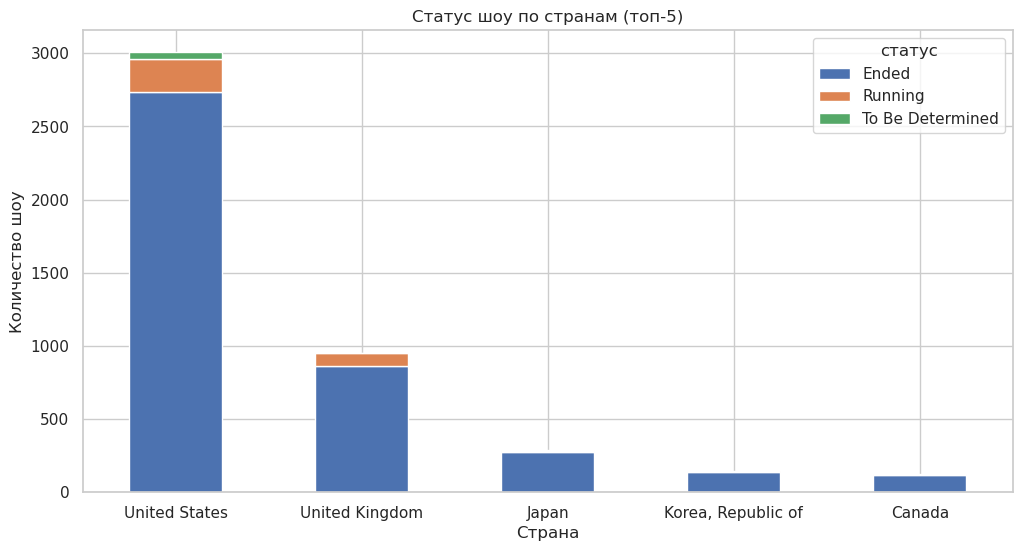

In [18]:
# Настройка стилей графиков
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'  # Для поддержки кириллицы


df = pd.read_csv("tvmaze_dataset_rus.csv")

# Преобразование дат
df['дата_премьеры'] = pd.to_datetime(df['дата_премьеры'], errors='coerce')
df['год_премьеры'] = df['дата_премьеры'].dt.year

# 1 график - - Анализ жанров и рейтингов
plt.figure(figsize=(12, 6))
top_genres = df.groupby('жанры')['средний_рейтинг'].mean().nlargest(10)  # Исправлено genres_df → df
sns.barplot(
    x=top_genres.values, 
    y=top_genres.index, 
    hue=top_genres.index,  
    palette="viridis", 
    legend=False
)
plt.title('Топ-10 жанров по среднему рейтингу')
plt.xlabel('Средний рейтинг')
plt.ylabel('Жанр')
plt.show()

# 2 график - Распределение рейтингов
plt.figure(figsize=(10, 6))
sns.histplot(df['средний_рейтинг'].dropna(), bins=20, kde=True)
plt.title('Распределение рейтингов телешоу')
plt.xlabel('Рейтинг')
plt.ylabel('Количество шоу')
plt.show()

# 3 график - Количество шоу по странам
plt.figure(figsize=(12, 6))
top_countries = df['страна'].value_counts().head(10)
sns.barplot(
    x=top_countries.values, 
    y=top_countries.index, 
    hue=top_countries.index,  # Добавлено явное указание hue
    palette="rocket", 
    legend=False  # Отключаем легенду
)
plt.title('Топ-10 стран по количеству телешоу')
plt.xlabel('Количество шоу')
plt.ylabel('Страна')
plt.show()

# 4 график - Зависимость рейтинга от длительности
plt.figure(figsize=(10, 6))
sns.scatterplot(x='длительность_минуты', y='средний_рейтинг', 
                data=df, alpha=0.6, hue='тип')
plt.title('Зависимость рейтинга от длительности эпизода')
plt.xlabel('Длительность (минуты)')
plt.ylabel('Рейтинг')
plt.legend(title='Тип шоу')
plt.show()

# 5 график - Количество премьер по годам
plt.figure(figsize=(12, 6))
premieres_by_year = df['год_премьеры'].value_counts().sort_index()
sns.lineplot(x=premieres_by_year.index, y=premieres_by_year.values)
plt.title('Количество премьер телешоу по годам')
plt.xlabel('Год')
plt.ylabel('Количество премьер')
plt.xticks([i for i in range(int(premieres_by_year.index.min()), int(premieres_by_year.index.max()), 5)], rotation=45)
plt.show()

# 6 график - Статус шоу по странам (топ-5)
top5_countries = df['страна'].value_counts().head(5).index
status_by_country = pd.crosstab(df['страна'], df['статус']).loc[top5_countries]

status_by_country.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Статус шоу по странам (топ-5)')
plt.xlabel('Страна')
plt.ylabel('Количество шоу')
plt.xticks(rotation=0)
plt.show()

Анализ графика 1. Мы видим, что лидируют жанры драма - триллер, науная фантастика и криминал, вероятно, это связано с тем, что людей увлекают эмоционально-насыщенные сюжеты
Анализ графика 2. Наиболее часто встречающийся рейтинг - 7-8. Возможно такая высокая статистика возникает из-за того, что платформа в основном публикует качественный контент, отсеивая низкорейтинговые шоу
Анализ графика 3. США занимает доминирующую позицию в реализации тв шоу
Анализ графика 4. Нельзя выявить четкую корреляцию между длительностью шоу и рейтингом
Анализ графика 5. Отмечаем рост количества шоу после 2010 года, видим тенденцию к уменьшению количества 
Анализ графика 6. Высокая доля завершенных шоу в США и Канаде, возможно выборка не является репрезентативной, так как платформа склонна опубликовывать статистику по шоу, снятых для англоязычной публики

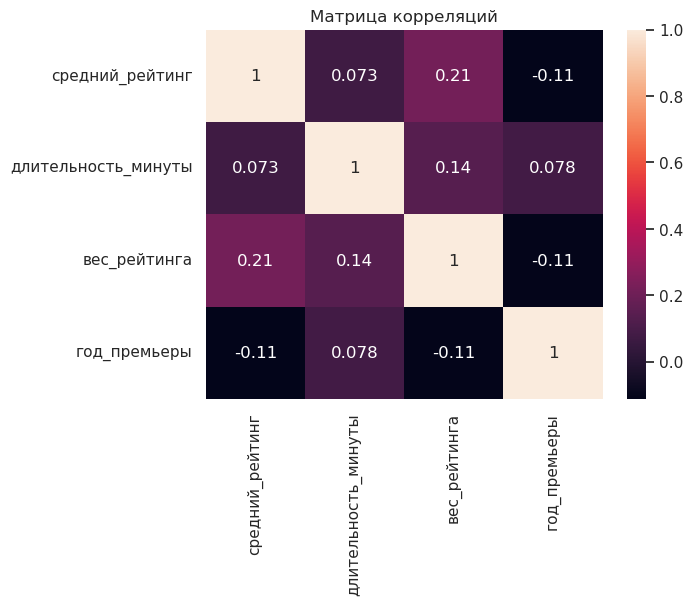

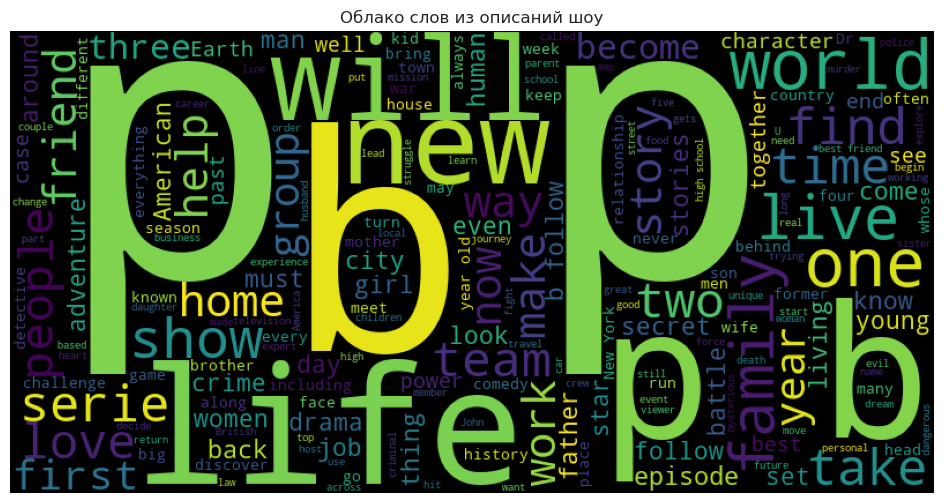

In [20]:
# Матрица корреляций
corr_matrix = df[['средний_рейтинг', 'длительность_минуты', 'вес_рейтинга', 'год_премьеры']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Матрица корреляций')
plt.show()
print()

text = ' '.join(df['описание'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Облако слов из описаний шоу')
plt.show()

Наиболее часто встречаемые слова в описаниях шоу

Импортируем чат в телеграме с обсуждениями фильмов и шоу

In [23]:
import json 

file_path = r"C:\Users\sharo\Downloads\Telegram Desktop\ChatExport_2025-03-24\result.json"

In [24]:
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

In [25]:
data["messages"][3]["text"]

'⚡️Букины возвращаются!\n\nТНТ и кинокомпания братьев Андреасян снимут новый сериал «Букины». К своим ролям вернутся Виктор Логинов, Наталья Бочкарева, Дарья Сагалова и Александр Якин. Всего будет 10 серий.'

In [26]:
text = [None for i in range(len(data["messages"]))]
for i, el in enumerate(data["messages"]):
    arr = []
    if isinstance(el["text"], str):
        arr = [el["text"]]
    else:
        for mes in el["text"]:
            if isinstance(mes, str):
                arr.append(mes)
            if isinstance(mes, dict) and mes["type"] == "bold":
                arr.append(mes["text"])

    text[i] = arr


text = [el for el in text if len(el) != 1 and el[0] != ""]
text[:5]

[['Линдси Лохан впервые стала мамой\n\n',
  'Page Six сообщает, что у них с Бадером Шаммасом родился сын, которого назвали Луай'],
 ['Водонаева с сыном. ', '\n\nКомментируйте этот пздц сами 🤦\u200d♂️'],
 ['Умер актёр Ангус Клауд, который сыграл одну из главных ролей в сериале «Эйфория». \n\n',
  'Предварительно, из-за передоза антидепрессантами. По словам родственников, он страдал от депрессии последние несколько лет. \n\nНеделю назад умер его отец и это окончательно подкосило 25-летнего артиста. Клауд всячески пытался справиться с заболеванием. На седьмой день после похорон папы его тело нашли в родительском доме в Калифорнии.'],
 ['Актриса Ирина Мирошниченко ушла из жизни в возрасте 81 года \n\n',
  'В конце июля актриса попала в реанимацию. Врачи обнаружили у нее новообразование в головном мозге. Ее подключили к ИВЛ и ввели в кому. Спасти Ирину не удалось.'],
 ['Джейсон Стэтхэм и Роузи Хантингтон-Уайтли ',
  'решили пожениться спустя 13 лет отношений',
  '. У пары двое детей.\n\nНу 

In [27]:
text = [[mes.strip().lower().replace("\n", " ") for mes in el if mes != "" and len(mes) > 2] for el in text]
text[:5]

[['линдси лохан впервые стала мамой',
  'page six сообщает, что у них с бадером шаммасом родился сын, которого назвали луай'],
 ['водонаева с сыном.', 'комментируйте этот пздц сами 🤦\u200d♂️'],
 ['умер актёр ангус клауд, который сыграл одну из главных ролей в сериале «эйфория».',
  'предварительно, из-за передоза антидепрессантами. по словам родственников, он страдал от депрессии последние несколько лет.   неделю назад умер его отец и это окончательно подкосило 25-летнего артиста. клауд всячески пытался справиться с заболеванием. на седьмой день после похорон папы его тело нашли в родительском доме в калифорнии.'],
 ['актриса ирина мирошниченко ушла из жизни в возрасте 81 года',
  'в конце июля актриса попала в реанимацию. врачи обнаружили у нее новообразование в головном мозге. ее подключили к ивл и ввели в кому. спасти ирину не удалось.'],
 ['джейсон стэтхэм и роузи хантингтон-уайтли',
  'решили пожениться спустя 13 лет отношений',
  '. у пары двое детей.  ну вроде узнали друг друга,

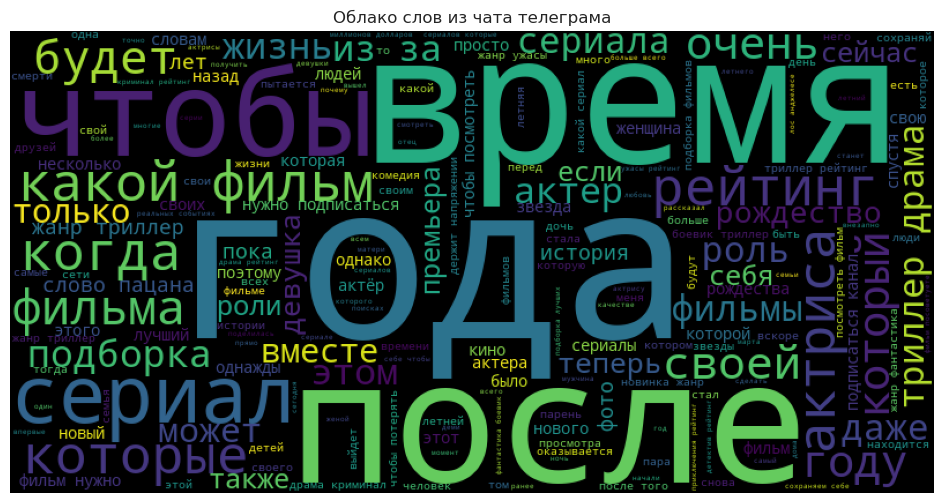

In [28]:
text2 = ' '.join([" ".join([word for mes in el for word in mes.split() if len(word) > 3]) for el in text])
wordcloud = WordCloud(width=800, height=400).generate(text2)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Облако слов из чата телеграма')
plt.show()